> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate No-show appointments dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil from public hospitals.The goal of this dataset is determining the top fetures which help us in determining if a patient will attend in his appointment or not.

The dataset contains (13) independent variables and (1) dependent variable.

**The independent variables are** :

1. PatientId : Identification of a patient
2. AppointmentID : Identification of each appointment
3. Gender : Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
4. ScheduledDay : what day the patient set up their appointment.
5. AppointmentDay : The real day to attend to hospital
6. Age : The Age of patient
7. Neighbourhood : The location of the hospital.
8. Scholarship : Indicates whether or not the patient is enrolled in Brasilian welfare program [Bolsa Família.](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)
9. Hipertension : True or False
10. Diabetes : True or False
11. Alcoholism : True or False
12. Handcap : [0 1 2 3 4]
13. SMS_received : True or False

The dependent variable is No-show (‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.)


For original source and more description of this dataset check this link on [kaggle](https://www.kaggle.com/joniarroba/noshowappointments) .

## Questions

1. What is the percentage of no-show at the specified time?
2. Finding Waiting Time and finding the correlation between it and target(No-show)!
3. Any age group is more present at its appointment ?
4. Is Neighbourhood column is important to determine show-up or no-show
5. How is Scholarship affecting the patient's absence?
6. Will the type of disease affect on attendance?
7. Do SMS reminders decrease the number of absences?



In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('data.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [4]:
df.shape

(110527, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB




*   ScheduledDay and AppointmentDay shoud be in datetime not string(object)

*   we don't need PatientId and AppointmentID so we will drob it 






In [6]:
df.duplicated().sum()

0

Great ! There is no dublicated value in dataset 

In [7]:
#show uniqe values in some columns 
for i in df.columns[np.r_[2, 5:14]]:
  print('The uniqe values of ' + str(i) + ' is ' + str(np.sort(df[i].unique())))
  print('-------------------------------')

The uniqe values of Gender is ['F' 'M']
-------------------------------
The uniqe values of Age is [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 102 115]
-------------------------------
The uniqe values of Neighbourhood is ['AEROPORTO' 'ANDORINHAS' 'ANTÔNIO HONÓRIO' 'ARIOVALDO FAVALESSA'
 'BARRO VERMELHO' 'BELA VISTA' 'BENTO FERREIRA' 'BOA VISTA' 'BONFIM'
 'CARATOÍRA' 'CENTRO' 'COMDUSA' 'CONQUISTA' 'CONSOLAÇÃO' 'CRUZAMENTO'
 'DA PENHA' 'DE LOURDES' 'DO CABRAL' 'DO MOSCOSO' 'DO QUADRO'
 'ENSEADA DO SUÁ' 'ESTRELINHA' 'FONTE GRANDE' 'FORTE SÃO JOÃO' 'FRADINHOS'
 'GOIABEIRAS' 'GRANDE VITÓRIA' 'GURIGICA' 'HORTO' 'ILHA DAS CAIEIRA

There is no human with age =  -1 so i will drop it 


After taking a look on dataset we can do this changes :
* Data not has any null or duplicated values. 
* We don't need 'PatientId' and 'AppointmentID' so we will drob it
* Correct splling of 'Hipertension' and 'Handcap' columns.
* Changing all column names with all lowercase letters and make it standerd
* Changing 'ScheduledDay' and 'AppointmentDay' datatypes to datetime format
* There is no human with age =  -1 so i will drop it 
* Create 'waiting' column indcating waiting time between scheduled day and appointment day 
* create 'scheduleddayname' and 'appointmentdayname' to help us in determinig which day more patients visit hospital
* Rename 'No-show' column to 'attended' column to minimize confusion
* Encoding 'attended' column




### Data Cleaning 

In [8]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [9]:
#Droping PatientId and AppointmentID
df.drop(columns=['PatientId','AppointmentID'] , inplace = True)

In [10]:
# Rename incorrect columns names and make all in lowercase letters
# Rename 'No-show' column to 'attended' column to minimize confusion
df = df.rename(columns={'Handcap':'handicap', 'Hipertension':'hypertension' , 'Gender':'gender' ,'ScheduledDay' : 'scheduledday',
                        'AppointmentDay':'appointmentday' ,'Age':'age' ,'Neighbourhood':'neighbourhood','Scholarship':'scholarship' ,
                        'Diabetes' :'diabetes' , 'Alcoholism':'alcoholism', 'SMS_received':'smsreceived' ,'No-show':'attended'
                        })

In [11]:
#Changing datatypes of ScheduledDay and AppointmentDay to datetime datatype
to_date = ['scheduledday'	,'appointmentday']
for i in to_date:
  df[i] = pd.to_datetime(df[i]).dt.date.astype('datetime64[ns]')

In [12]:
df = df[(df['age'] >=0) &(df['age'] <=100)]

In [13]:
# Create 'waitingtime' column indcating waiting time between scheduled day and appointment day
df['waitingtime'] = df['appointmentday'] - df['scheduledday']
df['waitingtime'] = df['waitingtime'].dt.days

In [14]:
# create 'scheduleddayname' and 'appointmentdayname' to help us in determinig which day more patients visit hospital
df['appointmentdayname'] = df['appointmentday'].dt.day_name()
df['scheduleddayname'] = df['scheduledday'].dt.day_name()

In [15]:
df = df[df['waitingtime']>=0]

In [16]:
#Encoding 'attended' column
df['attended'] = df['attended'].map({'No': 1, 'Yes': 0} )

In [17]:
df.columns

Index(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap',
       'smsreceived', 'attended', 'waitingtime', 'appointmentdayname',
       'scheduleddayname'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110514 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   gender              110514 non-null  object        
 1   scheduledday        110514 non-null  datetime64[ns]
 2   appointmentday      110514 non-null  datetime64[ns]
 3   age                 110514 non-null  int64         
 4   neighbourhood       110514 non-null  object        
 5   scholarship         110514 non-null  int64         
 6   hypertension        110514 non-null  int64         
 7   diabetes            110514 non-null  int64         
 8   alcoholism          110514 non-null  int64         
 9   handicap            110514 non-null  int64         
 10  smsreceived         110514 non-null  int64         
 11  attended            110514 non-null  int64         
 12  waitingtime         110514 non-null  int64         
 13  appointmentdayname  110514 no

In [19]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,smsreceived,attended,waitingtime,appointmentdayname,scheduleddayname
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0,Friday,Friday
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0,Friday,Friday
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,0,Friday,Friday
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0,Friday,Friday
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0,Friday,Friday


Good  -_*  Our data is now ready to play with it 

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 ( What is the percentage of no-show at the specified time?)

In [20]:
df['attended'].value_counts().index

Int64Index([1, 0], dtype='int64')

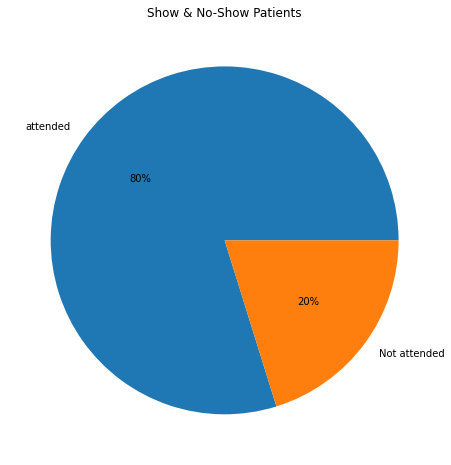

In [21]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
plt.figure(figsize=(8,8))
_ =plt.pie(df['attended'].value_counts() , labels=['attended' , 'Not attended'], autopct='%1.0f%%' );
plt.title('Show & No-Show Patients')
plt.show()

Then 20% of patients not attendings in their time 

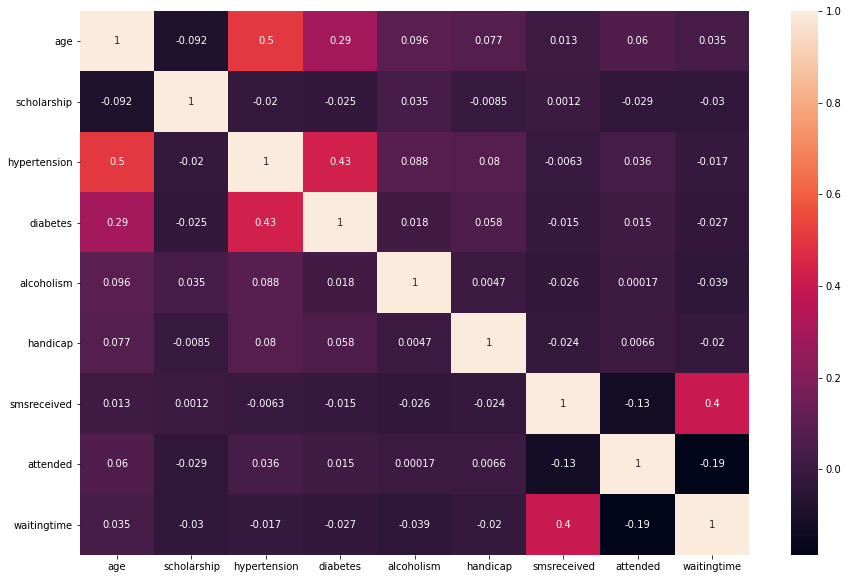

In [22]:
#Ploting correlation matrix to  show relationships between variables.
plt.figure(figsize=(15 ,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

We Can see that :
* There is an negative relationship between attendance and waiting time
* There is an negative relationship between attendance and sms recevied



### Research Question 2  (Finding the correlation between Waiting time  and target attendance!)

we do not see any appointments taken on Saturday and `Sunday'.

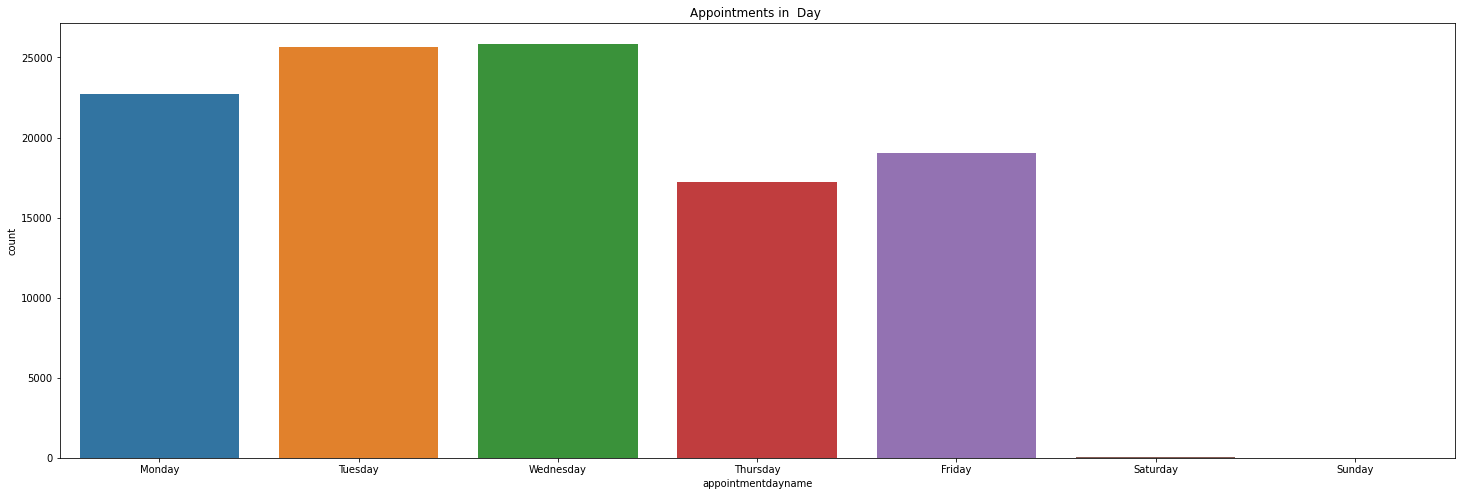

In [23]:
week_key = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

plt.figure(figsize=(25,8))
_ = sns.countplot(x=df['appointmentdayname'] , order=week_key,data = df)
plt.title('Appointments in  Day ')
plt.show()

There are no appointments on Sunday and very less appointments on Saturday

In [24]:
def plot_count( data ,title , x_column  ,hue_column = None ,figsize =(20,8) ,x_ticks_labels=None ):
  plt.figure(figsize=figsize)
  ax = sns.countplot(x=x_column , hue = hue_column ,data = data)
  if x_ticks_labels:
    ax.set_xticklabels(x_ticks_labels)
  plt.title(title)
  plt.show()


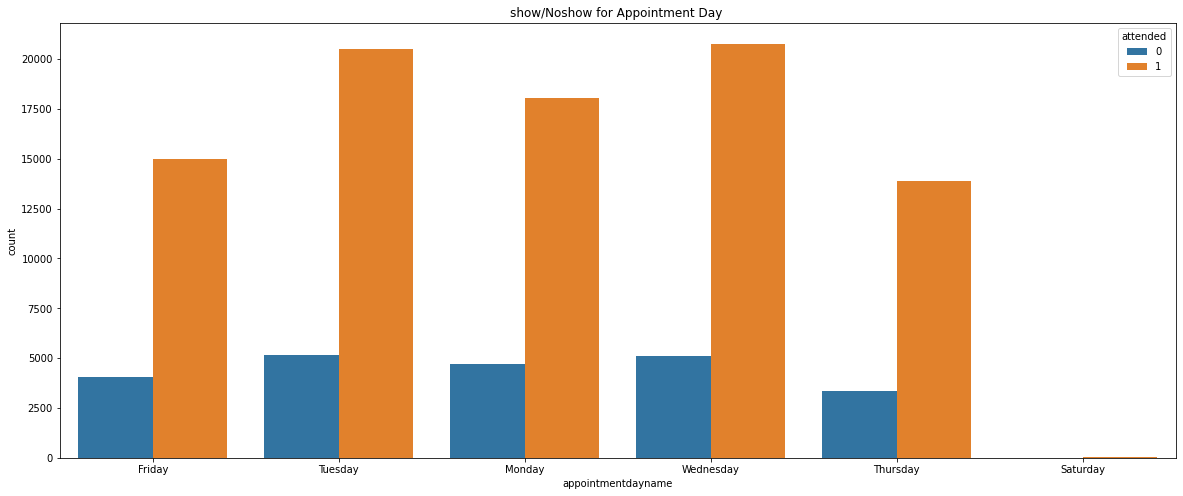

In [25]:
plot_count(df ,'show/Noshow for Appointment Day ' , df['appointmentdayname']  ,df['attended'] )

In [26]:
#Calculate the percentage of attendance by column C2
def attendance_perc(attend_c , C2 , data):
  return pd.DataFrame((data[data[attend_c] ==1].groupby(C2).size() / data.groupby(C2).size()) *100 ,columns=['percentage %'])

In [27]:
#Calculate the percentage of attendance by appointment day name
attendance_perc('attended' , 'appointmentdayname' , df)

,percentage %
appointmentdayname,
Friday,78.772742
Monday,79.358020
Saturday,76.923077
Thursday,80.658818
Tuesday,79.911846
Wednesday,80.313926


The percentage of attendance in all days are close But on Saturday's the percentage of visits is less 

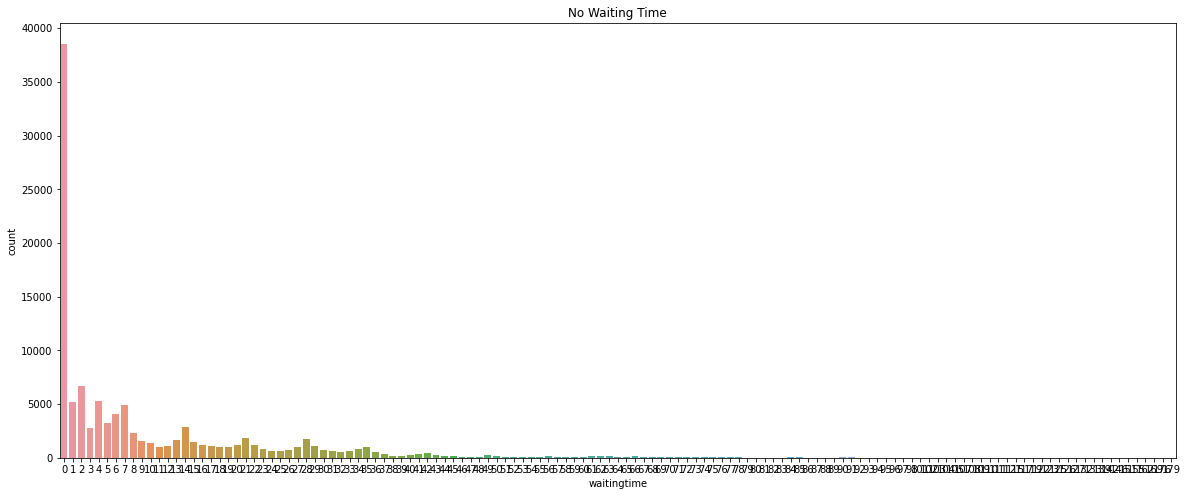

In [28]:
plot_count(df ,'No Waiting Time' , df['waitingtime'] )

Most people book their appointments on the same day or with 2 days in waiting

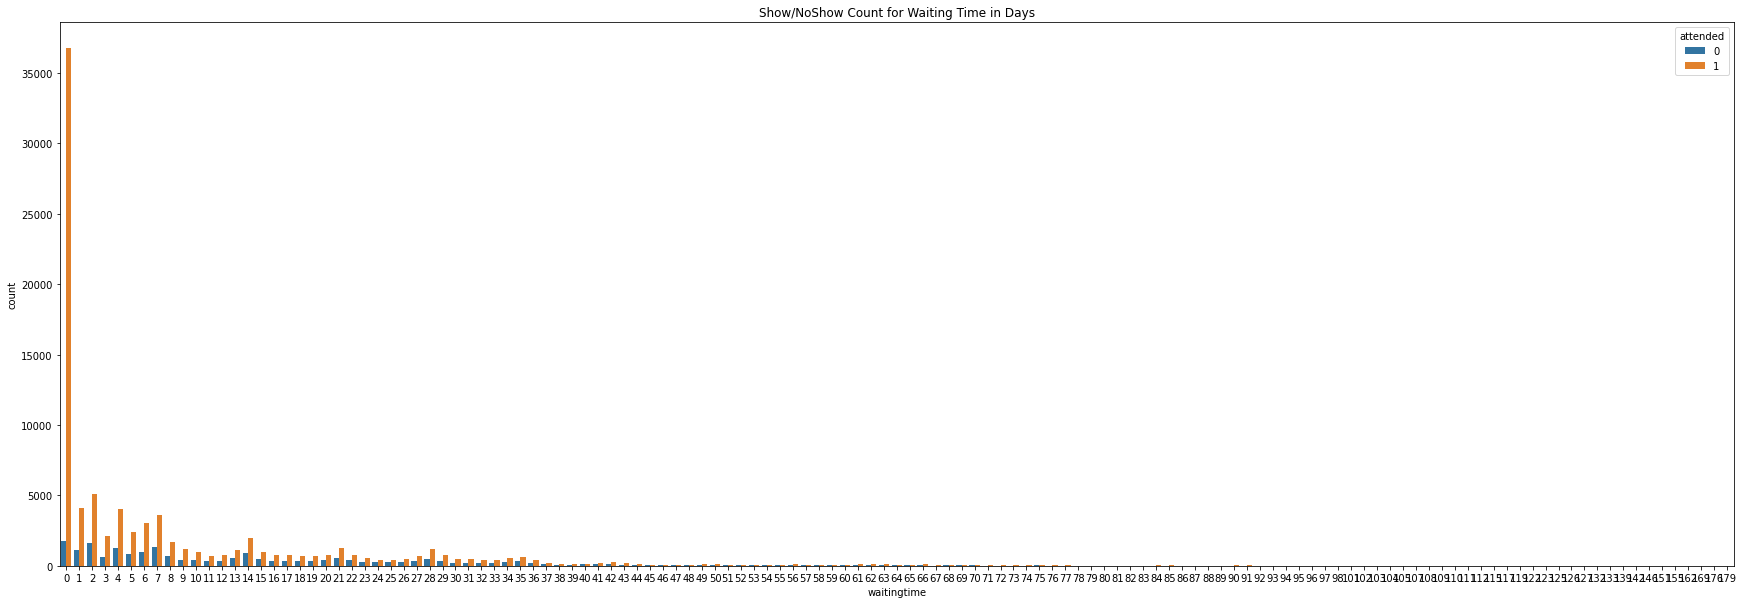

In [29]:
plot_count(df , "Show/NoShow Count for Waiting Time in Days" , df['waitingtime'] , df['attended'] , figsize=(30,10))

In [30]:
attendance_perc('attended' , 'waitingtime' , df)

,percentage %
waitingtime,
0,95.352697
1,78.649530
2,76.174896
3,76.526508
4,76.729679
...,...
155,40.000000
162,81.818182
169,87.500000


95% of the patients who have booked their appointments on the same day and attend in their appointments .for that this is a good feture

#Any age group is more present at its appointment ?



In [31]:
import plotly.express as px
def plot_box(Data , Y , Title):
  fig = px.box(data_frame = Data, y=Y,title=Title)
  fig.show()

In [32]:
#Distribution of age
plot_box(df , 'age' , 'Distribution Of Age')

In [33]:
df_not = df[df['attended']== 0 ].copy()
df_attended = df[df['attended']==1].copy()

In [34]:
plot_box(df_attended , 'age' , 'Distribution Of attended patient age')


In [35]:
plot_box(df_not , 'age' , 'Distribution Of not attended patient age')


From the above BoxPlot we can see that:

1.   Median of patients ages that did not show up to their appointment is 33 and ranging between 16:51

2.   Median of patients ages that showed up to their appointment is 38 and ranging between 18:56

3.   It looks like younger people no-show more than older ones.
 

#Does the gender of patient affect attendance?

In [36]:
df['gender'].value_counts()

F    71829
M    38685
Name: gender, dtype: int64

In [37]:
(df['gender'].value_counts()) / df.shape[0]

F    0.649954
M    0.350046
Name: gender, dtype: float64

In [38]:
df.groupby('gender')['attended'].value_counts()

gender  attended
F       1           57241
        0           14588
M       1           30962
        0            7723
Name: attended, dtype: int64

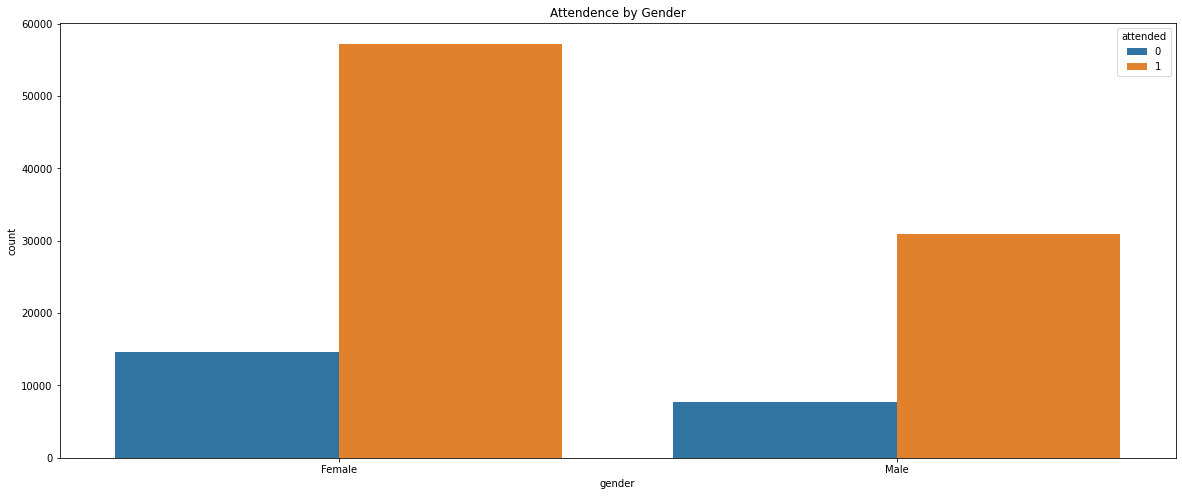

In [39]:

plot_count(df ,'Attendence by Gender' , df['gender'] , df['attended'] , x_ticks_labels=['Female' , 'Male'])

From above we can say that Female show-up more than Male. May be because we have more data of females

#Is Neighbourhood column is important to determine show-up or no-show?

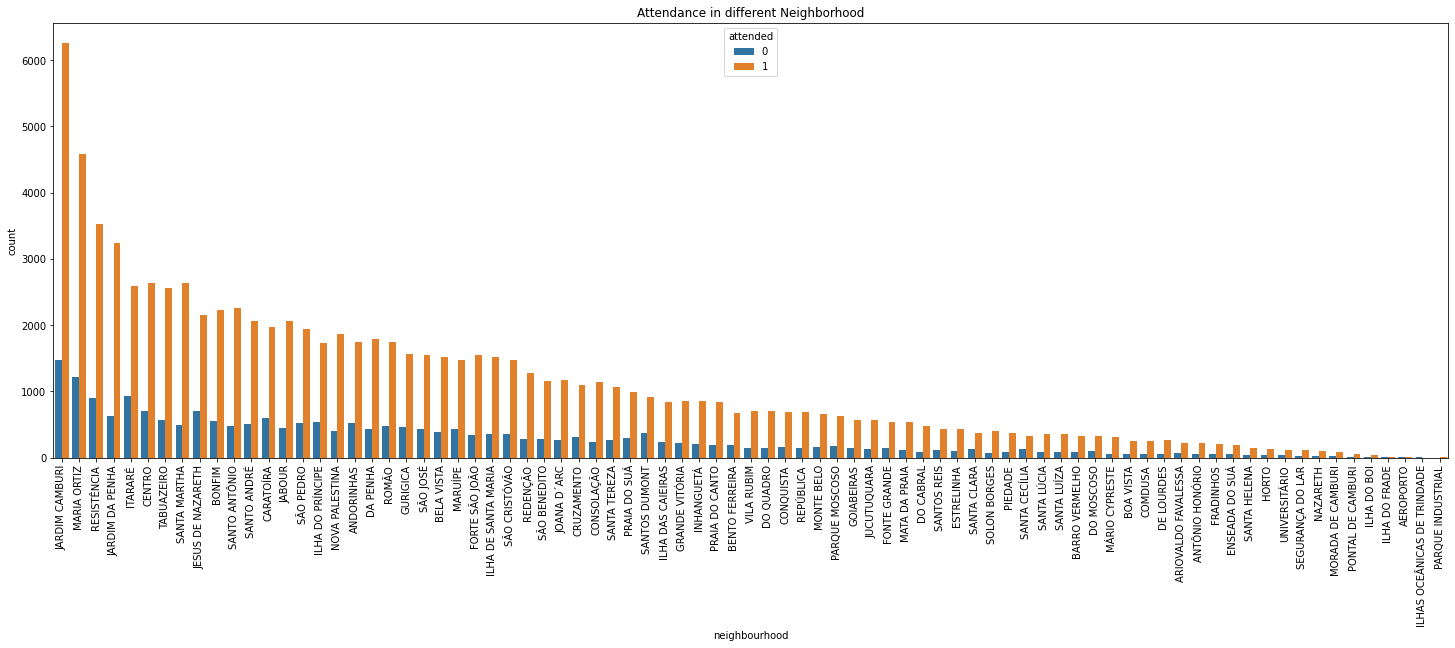

In [40]:
plt.figure(figsize=(25,8))
sns.countplot(x =df['neighbourhood'] , hue= df['attended'] , data=df, order=df.neighbourhood.value_counts().index)
plt.title('Attendance in different Neighborhood')
plt.xticks(rotation=90)
plt.show()


* From above the top 4 hosbitals that show up are ['JARDIM CAMBURI', 'MARIA ORTIZ', 'RESISTÊNCIA', 'JARDIM DA PENHA']
* Neighbourhood is important feature 

#How is Scholarship affecting the patient's absence?

In [41]:
df['scholarship'].value_counts()

0    99653
1    10861
Name: scholarship, dtype: int64

In [42]:
(df['scholarship'].value_counts() / df.shape[0])*100

0    90.172286
1     9.827714
Name: scholarship, dtype: float64

* 90% of patients not have Scholarship

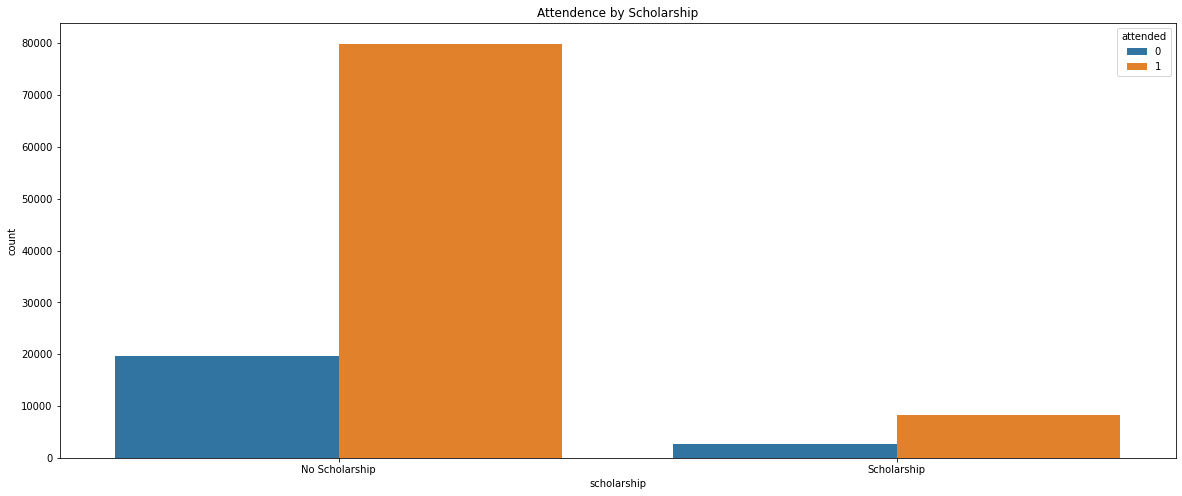

In [43]:

plot_count(df ,'Attendence by Scholarship' , df['scholarship'] , df['attended'] , x_ticks_labels=['No Scholarship' , 'Scholarship'])

In [44]:
#Percentage for Scholarship
attendance_perc('attended' , C2 = 'scholarship' , data = df )

,percentage %
scholarship,
0,80.198288
1,76.263696


* from above we can say that 80% of patients without Scholarship and 76% with Scholarship are show up 
* Scholarship feture can help us in  determining if a patient will attend in his ppointment.

#Will the type of disease affect on attendance?

In [45]:
df.columns

Index(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap',
       'smsreceived', 'attended', 'waitingtime', 'appointmentdayname',
       'scheduleddayname'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

Text(0.5, 1.0, 'Attendence by Handicap')

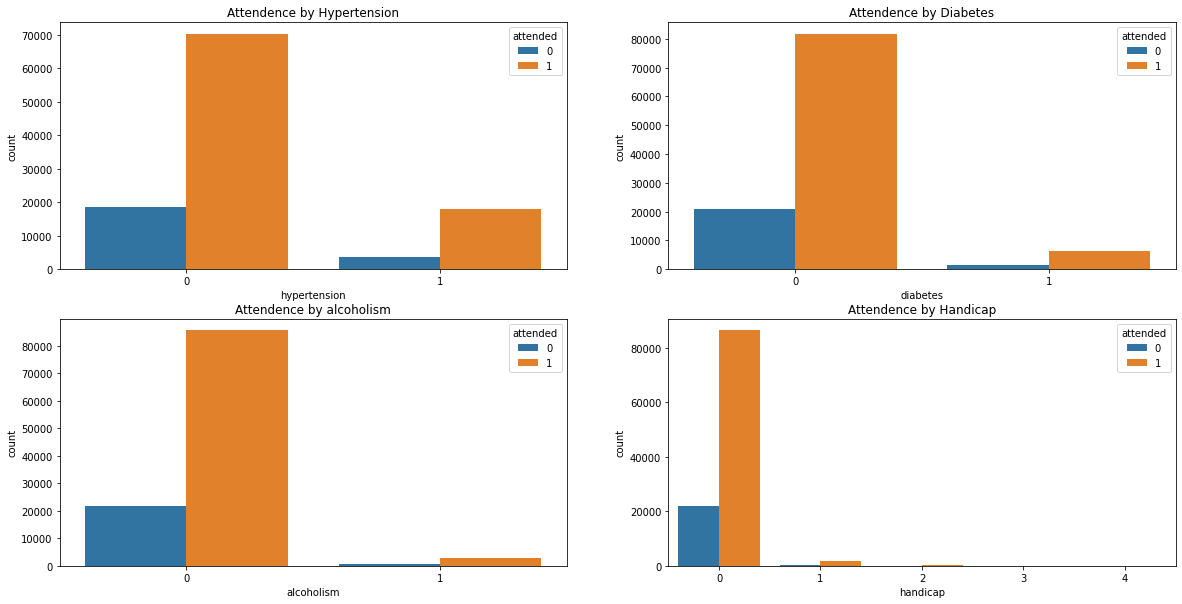

In [46]:
plt.figure(figsize=(20,10));
plt.subplot(2,2,1)
sns.countplot(df['hypertension'],hue=df['attended'])
plt.title('Attendence by Hypertension')
plt.subplot(2,2,2)
sns.countplot(df['diabetes'],hue=df['attended'])
plt.title('Attendence by Diabetes')
plt.subplot(2,2,3)
sns.countplot(df['alcoholism'],hue=df['attended'])
plt.title('Attendence by alcoholism')
plt.subplot(2,2,4)
sns.countplot(df['handicap'],hue=df['attended'])
plt.title('Attendence by Handicap')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110514 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   gender              110514 non-null  object        
 1   scheduledday        110514 non-null  datetime64[ns]
 2   appointmentday      110514 non-null  datetime64[ns]
 3   age                 110514 non-null  int64         
 4   neighbourhood       110514 non-null  object        
 5   scholarship         110514 non-null  int64         
 6   hypertension        110514 non-null  int64         
 7   diabetes            110514 non-null  int64         
 8   alcoholism          110514 non-null  int64         
 9   handicap            110514 non-null  int64         
 10  smsreceived         110514 non-null  int64         
 11  attended            110514 non-null  int64         
 12  waitingtime         110514 non-null  int64         
 13  appointmentdayname  110514 no

In [48]:
#Percentage for ['Hipertension','Diabetes','Alcoholism' , 'Handcap']
columns = ['hypertension','diabetes','alcoholism' , 'handicap']
for i in columns:
  print('Percentage for ' + i )
  print((df[df['attended'] == 1 ].groupby(i).size() / df.groupby(i).size()) *100 )
  print('-'*20)

Percentage for hypertension
hypertension
0    79.102509
1    82.697248
dtype: float64
--------------------
Percentage for diabetes
diabetes
0    79.642394
1    81.996727
dtype: float64
--------------------
Percentage for alcoholism
alcoholism
0    79.810366
1    79.851190
dtype: float64
--------------------
Percentage for handicap
handicap
0    79.766160
1    82.269155
2    79.781421
3    76.923077
4    66.666667
dtype: float64
--------------------


From above we can say that
* 83% of patients with Hipertension are show up -- good feture
* 82%  of patients with Diabetes are show up -- good feture
* patients with or without Alcoholism have the same Percentage , For that this feture will not help us determining if a patient will attend in his ppointment.


#Do SMS reminders decrease the number of absences?

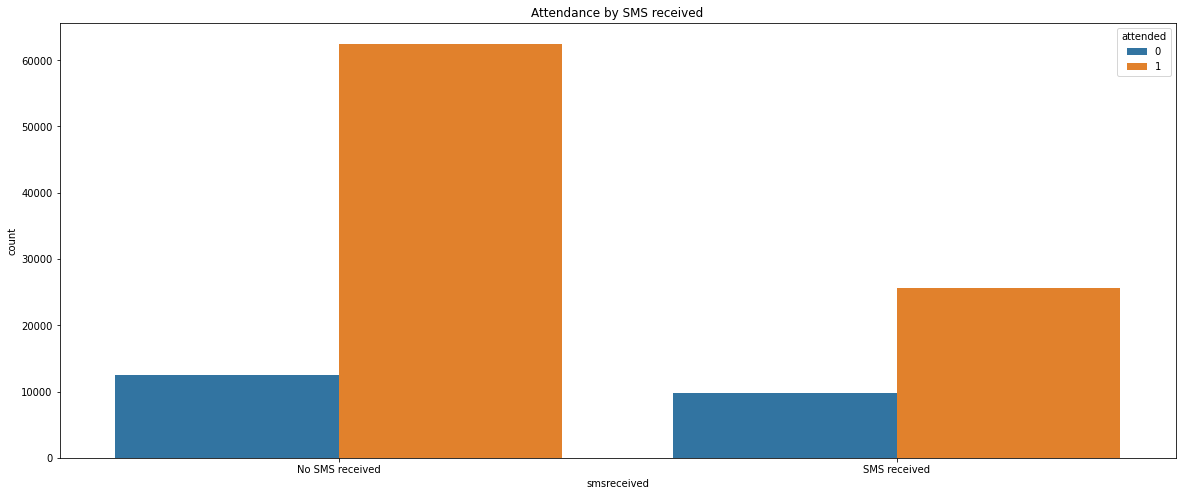

In [49]:

plot_count(df ,'Attendance by SMS received' ,df['smsreceived'] ,df['attended'] ,  x_ticks_labels=['No SMS received', 'SMS received']  )

In [50]:
attendance_perc('attended', 'smsreceived' , data = df)

,percentage %
smsreceived,
0,83.304679
1,72.424678


Surprise ! 83% of patients with no SMS received attend in their appointments.This is a good feture in determining if a patient will attend in his appointment. (Although realistic, people who receive messages have more to come to their appointments than others)

<a id='conclusions'></a>
## Conclusions
**Results :** 
* (No-show) column : it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

* Data Not Has Any Null Value 

* 20% of patients not show up to their appointment


* It looks like younger people no-show more than older ones.
* There is an negative relationship between attendance and waiting time
* There is an negative relationship between attendance and sms recevied
* we could see that Waiting time by daya , Gender, Age, Neighbourhood, Scholarship and Hypertension are the top fetures that help us in determining if a patient will attend in his ppointment.

**Limitations**:
1. Cannot show strong correlations between fetures since most of our data is categorical 
2. By looking to 'appointmentday' column we can say that we were given only a snapshot of complete data. Making analysis on a snapshot data is difficult
3. The statistics used here is descriptive statistics meaning that we did not create any hypothes with our data
 
